In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# **Explore**
1. load the dataset
2. check for missing values and duplicates
3. ( df.info() ,df.describe()) to help understand the dataset and summarize it


In [102]:
df= pd.read_csv("D:\college_assignments\machine learning\student-por.csv")
df.head(10)


<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\moham\AppData\Local\Temp\ipykernel_1516\3900400020.py:1: SyntaxWarning: invalid escape sequence '\c'
  df= pd.read_csv("D:\college_assignments\machine learning\student-por.csv")


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [103]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [4]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
644    False
645    False
646    False
647    False
648    False
Length: 649, dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


# **visualization**
1. Histograms – Understanding Feature Distributions
2. Scatter Plots – Identifying Relationships Between Variables
3. boxplots – Assessing Categorical Feature Impact

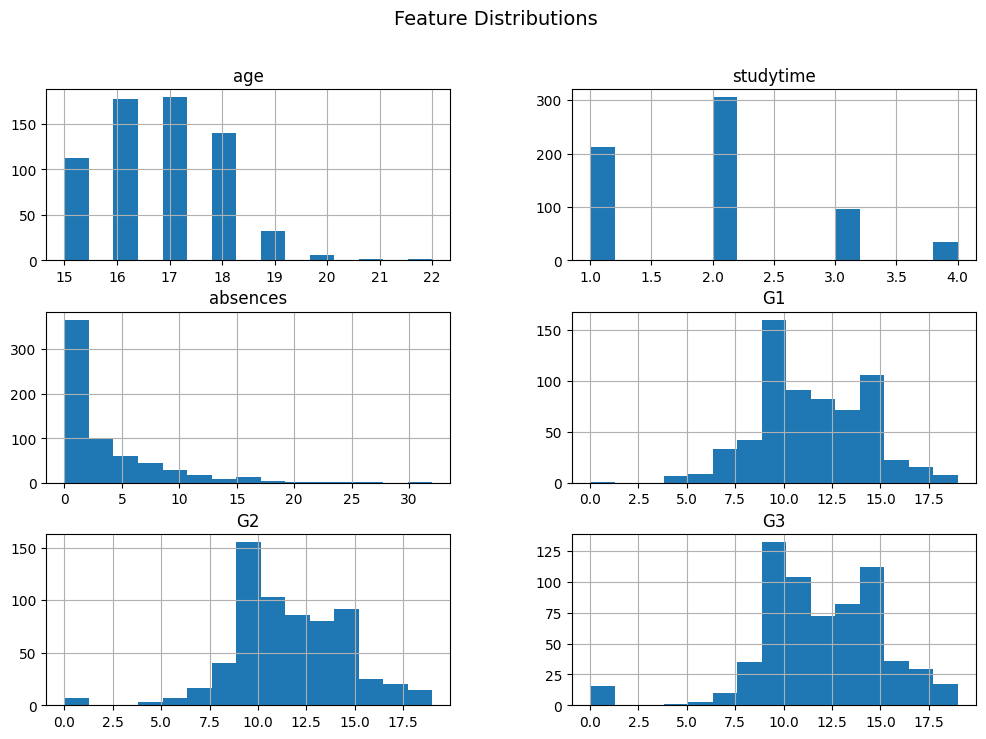

In [7]:

df[["age", "studytime", "absences", "G1", "G2", "G3"]].hist(figsize=(12, 8), bins=15)
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

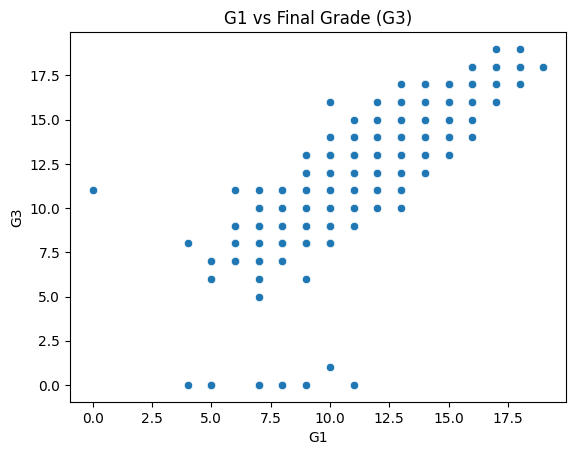

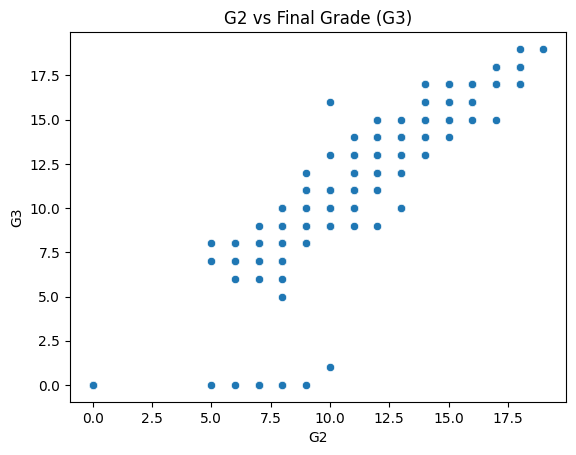

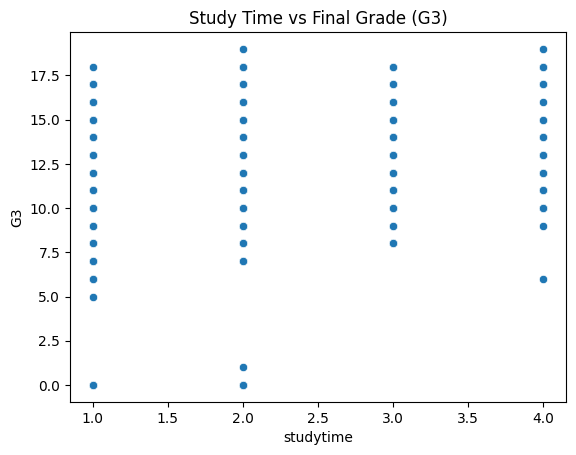

In [8]:
sns.scatterplot(x=df["G1"], y=df["G3"])
plt.title("G1 vs Final Grade (G3)")
plt.show()

sns.scatterplot(x=df["G2"], y=df["G3"])
plt.title("G2 vs Final Grade (G3)")
plt.show()

sns.scatterplot(x=df["studytime"], y=df["G3"])
plt.title("Study Time vs Final Grade (G3)")
plt.show()

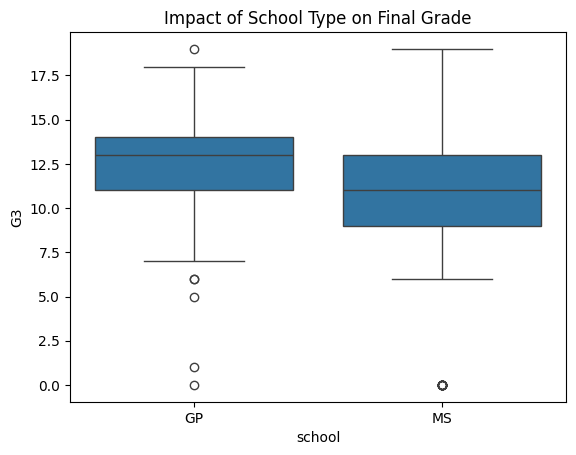

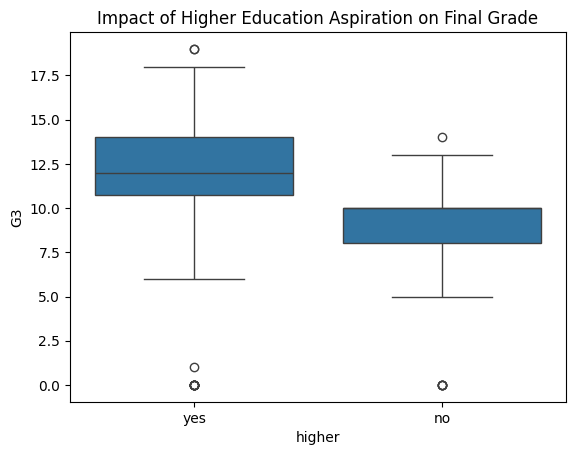

In [9]:
sns.boxplot(x=df["school"], y=df["G3"])
plt.title("Impact of School Type on Final Grade")
plt.show()

sns.boxplot(x=df["higher"], y=df["G3"])
plt.title("Impact of Higher Education Aspiration on Final Grade")
plt.show()

# **preprocessing**
1. Handling Categorical Variables (One-Hot Encoding)
2. Scaling Numerical Features
3. Feature Selection
4. Dropping Less Relevant Features

In [104]:
# Identify categorical columns
categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
                        'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 
                        'nursery', 'higher', 'internet', 'romantic']

# Apply One-Hot Encoding 
encoder = OneHotEncoder(drop="first", sparse_output=False)  
encoded_data = encoder.fit_transform(df[categorical_features])

# Convert encoded data back to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

# Drop original categorical columns and merge encoded features
df = df.drop(columns=categorical_features).reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)

print("Encoded categorical variables added to dataset!")

Encoded categorical variables added to dataset!


In [105]:
# Select numerical features that need scaling
numeric_features = ['age', 'studytime', 'failures', 'absences', 'G1', 'G2']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_features])

# Convert scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numeric_features)

# Drop original numerical columns and merge scaled features
df = df.drop(columns=numeric_features).reset_index(drop=True)
df = pd.concat([df, scaled_df], axis=1)

print("Numerical features successfully scaled!")

Numerical features successfully scaled!


G3                   1.000000
G2                   0.918548
G1                   0.826387
failures             0.393316
higher_yes           0.332172
school_MS            0.284294
studytime            0.249789
Medu                 0.240151
Fedu                 0.211800
Dalc                 0.204719
Walc                 0.176619
reason_reputation    0.170944
address_U            0.167637
internet_yes         0.150025
Mjob_teacher         0.134910
reason_other         0.132577
sex_M                0.129077
traveltime           0.127173
Fjob_teacher         0.125916
freetime             0.122705
age                  0.106505
Mjob_health          0.101244
health               0.098851
absences             0.091379
romantic_yes         0.090583
goout                0.087641
guardian_other       0.080729
schoolsup_yes        0.066405
famrel               0.063361
activities_yes       0.059791
Mjob_other           0.059251
famsup_yes           0.059206
paid_yes             0.054898
Fjob_servi

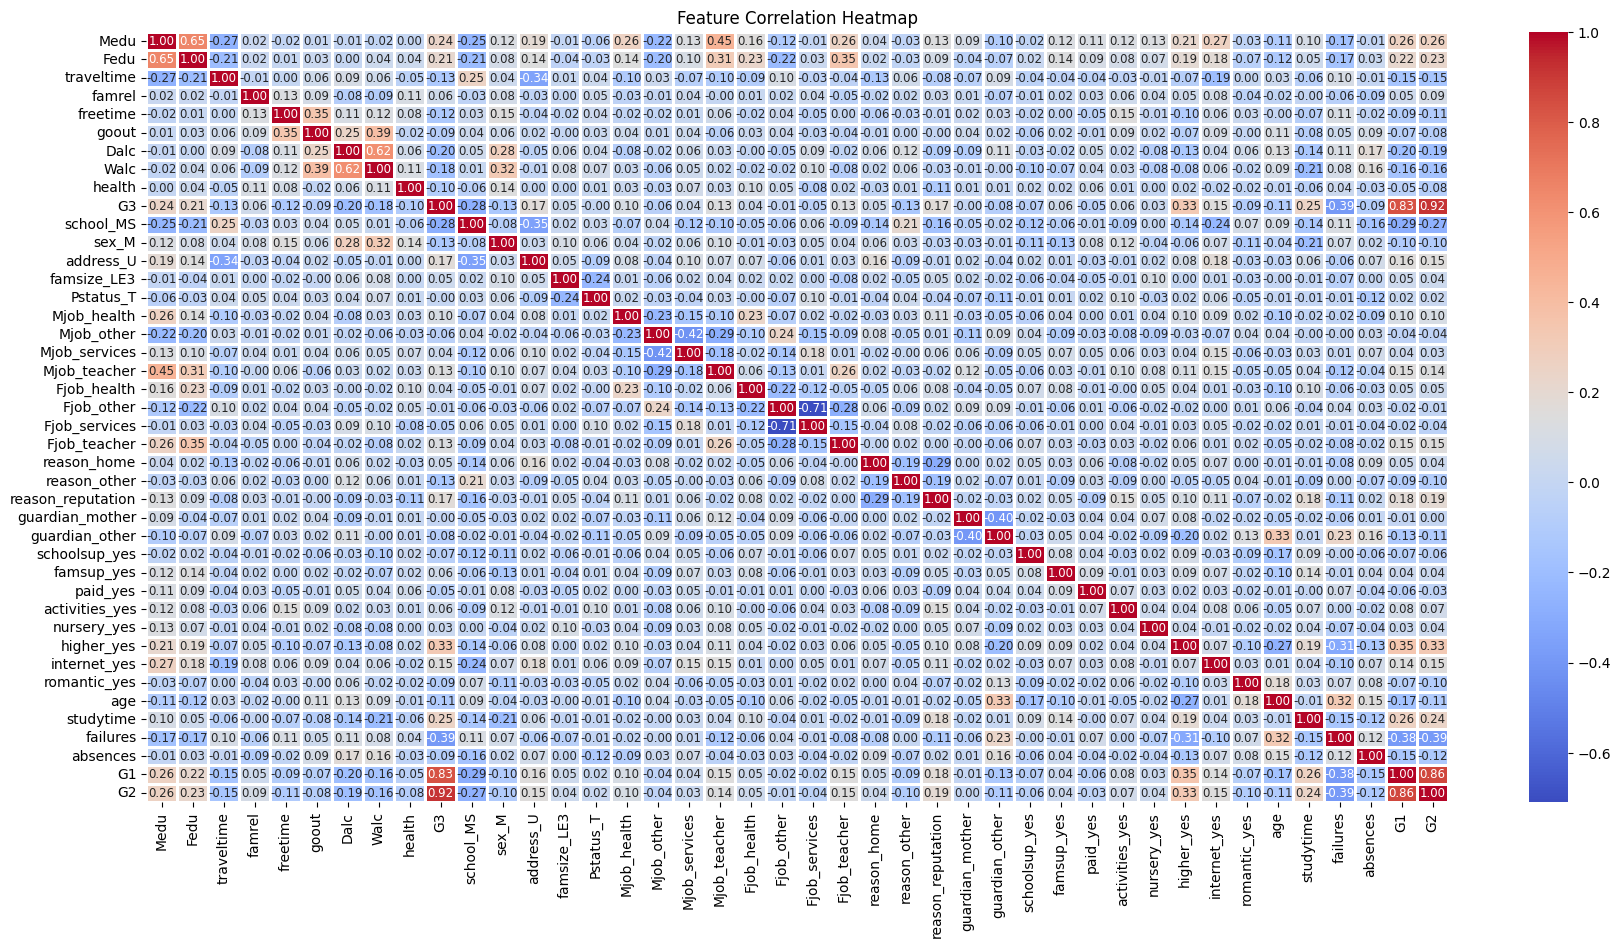

In [106]:

# Calculate correlation between all features and G3
correlation_matrix = df.corr()

# Sort features based on correlation with G3
correlations = correlation_matrix["G3"].abs().sort_values(ascending=False)
print(correlations)

# Heatmap
plt.figure(figsize=(21, 10))  
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=2,annot_kws={"size": 8.5})

plt.title("Feature Correlation Heatmap")
plt.show()

In [107]:
# removes features with weak relationships to the target
df = df.drop(columns=['Fjob_other', 'guardian_mother', 'Pstatus_T', 'nursery_yes', 'Fjob_health', 'Mjob_services', 'reason_home', 'famsize_LE3'])

In [108]:
# Define features X and target y
X = df.drop(columns=["G3"])  # G3 is the target 
y = df["G3"]

# Split the dataset into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print("Preprocessing complete! Ready for modeling.")

Training set size: (519, 33)
Testing set size: (130, 33)
Preprocessing complete! Ready for modeling.


# **Simple regression**
1. Preparing the Features
2. Making Predictions on Test Data
3. Evaluating Model Performance
4. Visualizing Regression Line

In [16]:
X = df['G2'] # Selecting G2 as the strongest predictor(because it has the highest correlation with G3)
y = df['G3'] # Selecting G3 as the Target variable


# Scale numeric features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Simple Linear Regression:
  R²: 0.869
  MSE: 1.279


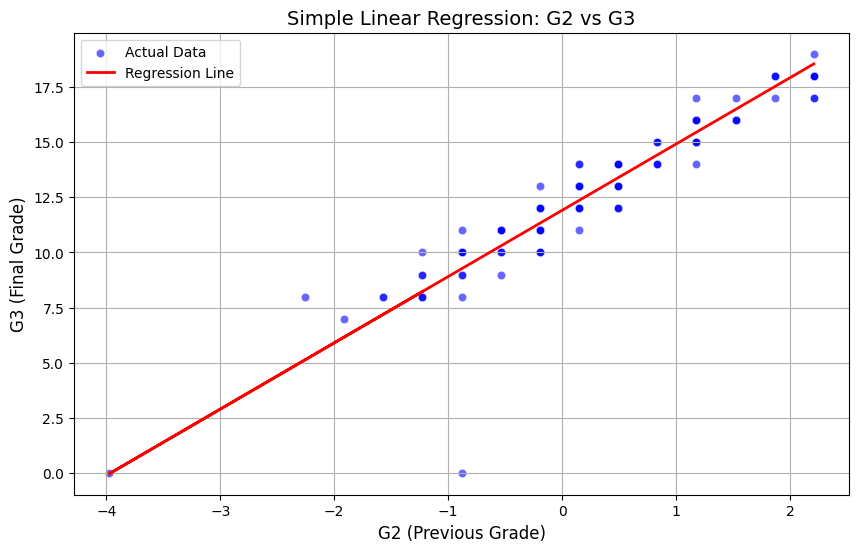

In [ ]:
# Train on the strongest single feature 
model_simple = LinearRegression().fit(X_train[['G2']], y_train)

# Evaluate
y_pred= model_simple.predict(X_test[['G2']])
print(f"Simple Linear Regression:")
print(f"  R²: {r2_score(y_test, y_pred):.3f}")
print(f"  MSE: {mean_squared_error(y_test, y_pred):.3f}")

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['G2'], y=y_test, color='blue', alpha=0.6, label='Actual Data')
plt.plot(X_test['G2'], y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression: G2 vs G3', fontsize=14)
plt.xlabel('G2 (Previous Grade)', fontsize=12)
plt.ylabel('G3 (Final Grade)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

**Multiple linear regression**
1. ANOVA for detecting the most imortant categorical features 
2. correlation for detecting the most significant numerical features 

In [89]:
df2 = pd.read_csv("D:\college_assignments\machine learning\student-por.csv")
df2

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\moham\AppData\Local\Temp\ipykernel_1516\854133967.py:1: SyntaxWarning: invalid escape sequence '\c'
  df2 = pd.read_csv("D:\college_assignments\machine learning\student-por.csv")


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [90]:
from scipy.stats import f_oneway # to start using ANOVA 

In [91]:
# testing categorical features to know what to keep and what to drop 
significant_features = []

for feature in categorical_features:
    feature_values = df2[feature].unique()
    groups = [df2[df2[feature] == value ]['G3'] for value in feature_values]
    #run anova 
    f_stat, p_value = f_oneway(*groups)
    if p_value < 0.05:
        significant_features.append(feature)

print (significant_features)



['school', 'sex', 'address', 'Mjob', 'Fjob', 'reason', 'higher', 'internet', 'romantic']


In [92]:
# to know the most significant numerical featurs we look at the heatmap -> correlation matrix
#coming back to the filtered (encoded + scaled) and encoded data frame -> df 
df.columns

Index(['Medu', 'Fedu', 'traveltime', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'G3', 'school_MS', 'sex_M', 'address_U',
       'Mjob_health', 'Mjob_other', 'Mjob_teacher', 'Fjob_services',
       'Fjob_teacher', 'reason_other', 'reason_reputation', 'guardian_other',
       'schoolsup_yes', 'famsup_yes', 'paid_yes', 'activities_yes',
       'higher_yes', 'internet_yes', 'romantic_yes', 'age', 'studytime',
       'failures', 'absences', 'G1', 'G2'],
      dtype='object')

In [93]:
# Ready the training set: extract encoded significant features + numerical features
import re
from sklearn.model_selection import train_test_split

# Get all columns from the encoded DataFrame
all_columns = df.columns.tolist()

# Selecting  
# 1. Numerical features , AND
# 2. Encoded columns of significant features list that has been produces from anova test('school', 'higher')
selected_columns = [
    col for col in all_columns 
    if (
        col in numeric_features  # Keep numerical features
        or any(col.startswith(feat + '_') for feat in significant_features  # Keep encoded significant categoricals
    )
    )
]

# Filter the DataFrame
X = df[selected_columns]
y = df['G3']

# Corrected train_test_split syntax (parentheses and assignment)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('Processing successful! Ready for training.')
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Processing successful! Ready for training.
Training set shape: (519, 19), Test set shape: (130, 19)


MULTIPLE LINEAR REGRESSION MODEL 

In [94]:

multi_lin_reg_model = LinearRegression()
multi_lin_reg_model.fit(X_train , y_train)

LinearRegression()

In [95]:
# making predections 
y_pred = multi_lin_reg_model.predict(X_test)

**Calculating :**
1. mean square error 
2. mean absolute error 
3. R2 Score


In [97]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score 
mae = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error (y_test , y_pred)
r2 = r2_score(y_test , y_pred)

print ("mean absolute error : " , mae ,'\n')
print ("mean squared error : " , mse , '\n')
print ("R2 Scorre : " , r2  ,'\n')


mean absolute error :  0.7588196489677822 

mean squared error :  1.3890696806422826 

R2 Scorre :  0.8575563845364519 



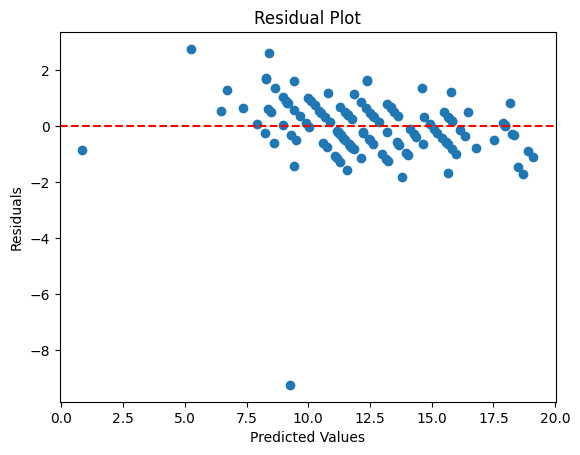

In [98]:
import matplotlib.pyplot as plt
residuals = y_test - multi_lin_reg_model.predict(X_test)
plt.scatter(multi_lin_reg_model.predict(X_test), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

**Polynomail Model** 

In [110]:
from sklearn.preprocessing import PolynomialFeatures

In [111]:
#coming back to the filtered and encoded data set -> df to get the X and Y 
X = df[['G2']] # to make it data frame not a series -> important for sklearn 
Y = df['G3']


X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size = 0.20 , random_state = 42)


#use pipelineto make the process ordered well and easier 
#inside pipeline we do the follwing :
#1- scale 
#2- make polynomial features 
#3- do the regression
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree= 2),
    LinearRegression()
)

pipeline.fit(X_train , y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

**Evaluate** the poly model with degree = 2

In [112]:
test_score = pipeline.score(X_test , y_test)
print (f' test Score = {test_score:.3f}')

 test Score = 0.868


c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


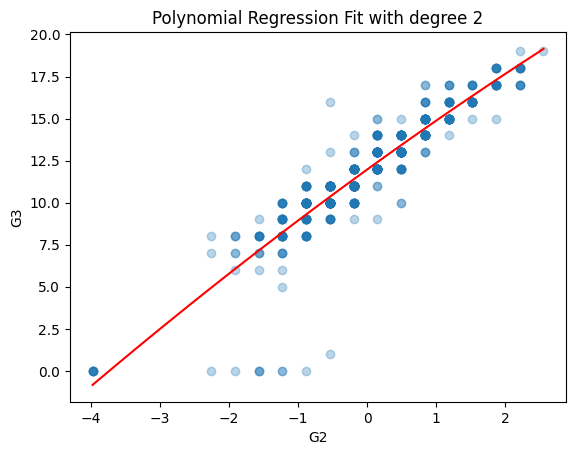

In [114]:
import matplotlib.pyplot as plt
import numpy as np

# Create prediction line
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = pipeline.predict(x_range)

# Plot
plt.scatter(X, y, alpha=0.3)
plt.plot(x_range, y_pred, color='red')
plt.xlabel('G2')
plt.ylabel('G3')
plt.title('Polynomial Regression Fit with degree 2')
plt.show()

**polynomial model with degree 3**

In [115]:
pipeline2 = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree= 3),
    LinearRegression()
)

pipeline2.fit(X_train , y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

**Evaluating** the model with degree = 3

In [123]:
test_score2 = pipeline2.score(X_test , y_test)
print (f'Test score for poly model with degree = 3 : {test_score2:.3f}') # the score has decreased by 0.02

Test score for poly model with degree = 3 : 0.864


c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


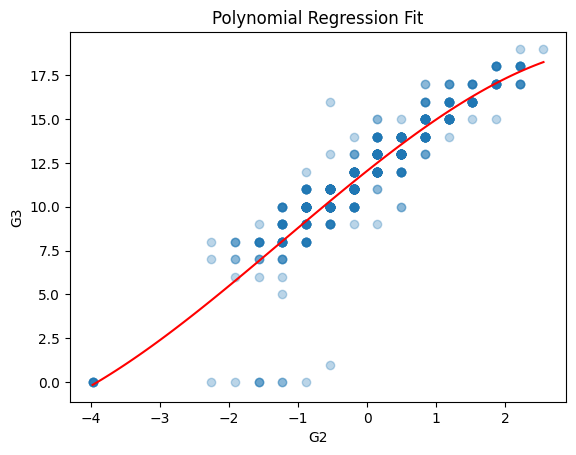

In [117]:
import matplotlib.pyplot as plt
import numpy as np

#create prediction line 
x_range = np.linspace(X.min() , X.max() ,100).reshape(-1,1)
y_pred = pipeline2.predict(x_range)

# Plot
plt.scatter(X, y, alpha=0.3)
plt.plot(x_range, y_pred, color='red')
plt.xlabel('G2')
plt.ylabel('G3')
plt.title('Polynomial Regression Fit')
plt.show()

**polynomial model with degeree = 4**

In [118]:
pipeline3 = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree= 4),
    LinearRegression()
)

pipeline3.fit(X_train , y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

**Evaluate** the polynomial model with degree = 4

In [ ]:
test_score3 = pipeline3.score(X_test , y_test)
print (f'Test score for the polynomial model with degree = 4 : {test_score3:.3f}') # decreased by 0.01

Test score for the polynomial model with degree = 4 : 0.861


c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


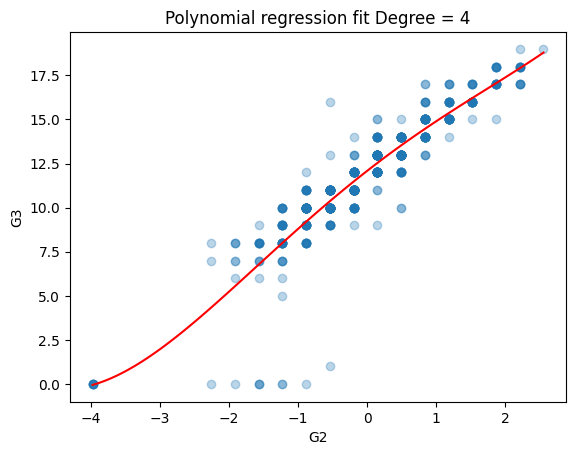

In [130]:
import numpy as np 
import matplotlib.pyplot as plt

x_range = np.linspace(X.min() , X.max() , 100)
y_pred  = pipeline3.predict(x_range)

#plot 
plt.scatter(X ,y ,alpha = 0.3)
plt.plot (x_range , y_pred ,color = 'red' )
plt.xlabel("G2")
plt.ylabel("G3")
plt.title("Polynomial regression fit Degree = 4")
plt.show ()